In [1]:
from pylab import *

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_dataset = load_boston()

In [4]:
import pandas as pd

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


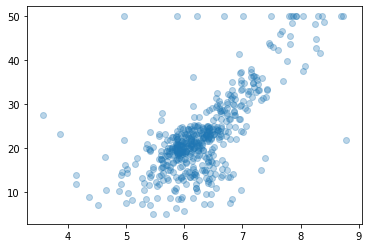

In [6]:
scatter(boston['RM'], boston['MEDV'], alpha=0.3)
show()

In [7]:
x = boston['RM']
X = array([x, x*x, x*x*x])
Y = array(boston['MEDV'])

In [8]:
import torch

In [9]:
X = torch.Tensor(X.T)
Y = torch.Tensor(Y.reshape(506, 1))

In [10]:
### Estandarizacion

X_mean = torch.mean(X, dim=0)
X_var = torch.var(X, dim=0)

X = (X - X_mean) / torch.sqrt(X_var)

In [11]:
class LinearModel(torch.nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        
        self.F = torch.nn.Linear(input_dim, 1)
        
        self.loss = None
        
    def forward(self, x):
        return self.F(x)

In [12]:
# Para debuguear
from torch.utils.tensorboard import SummaryWriter

In [13]:
# Función de entrenamiento
def train(model, x, y, epochs=1, lr=0.01):
    tb = SummaryWriter()
    
    # Función de costo (MEAN SQUARED ERROR)
    loss_fn = torch.nn.MSELoss()
    # Optimizador SGD (Gradient Descent)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    model.train()
    
    for epoch in range(epochs):
        
        preds = model(x)
        loss = loss_fn(preds, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        model.loss = loss.item()

        tb.add_scalar('Loss', loss.item(), epoch)
        
    tb.close()

In [14]:
!rm -r runs

In [15]:
model = LinearModel(3)

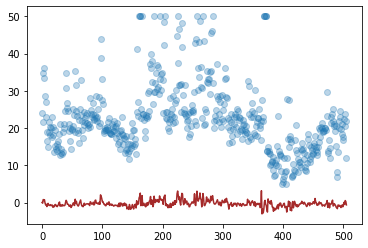

In [16]:
_z = model(X).detach()
scatter(range(506), boston['MEDV'], alpha=0.3)
plot(_z, c='brown')
show()

In [17]:
train(model, X, Y, epochs=100000, lr=0.333)

In [18]:
print(model.loss)

37.045196533203125


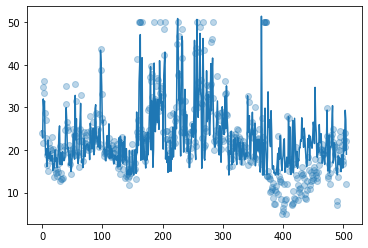

In [19]:
_z = model(X).detach()
scatter(range(506), boston['MEDV'], alpha=0.3)
plot(_z[:,0])
show()

![](images/Loss_3.svg)